# This reads in a file with daily AO data

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Read NRT AO index

In [3]:
df = pd.read_csv('/home/robbie/Dropbox/beaufort_sea/random_data/nrt_ao.csv',
                 delim_whitespace=True,header=0,names=['Date','AO','NAO','PNA','AAO'])

first_date = datetime.date(year=2020,month=11,day=3)

df.index = [first_date + datetime.timedelta(days=x) for x in range(df.shape[0])]

df_nrt = df.drop(['Date','NAO','PNA','AAO'], axis=1)

df_nrt

,AO
2020-11-03,2.18100
2020-11-04,2.91900
2020-11-05,3.69440
2020-11-06,3.25710
2020-11-07,2.11360
...,...
2021-02-26,2.97990
2021-02-27,2.49620
2021-02-28,2.40840
2021-03-01,1.35580


In [4]:
df = pd.read_csv('/home/robbie/Dropbox/beaufort_sea/random_data/norm.daily.ao.index.b500101.current.ascii',
                 delim_whitespace=True,header=None,names=['Year','Month','Day','AO'])
df['date'] = [datetime.date(year=int(year),month=int(month),day=int(day)) for (year,month,day) in zip(df['Year'],df['Month'],df['Day'])]
df.set_index('date',inplace=True)
df_daily = df
df = pd.concat([df_daily, df_nrt[df_nrt.index>df_daily.index[-1]]])

df['Month'] = [dt.month for dt in df.index]
df['Day'] = [dt.day for dt in df.index]
df['Year'] = [dt.year for dt in df.index]

df

,Year,Month,Day,AO
1950-01-01,1950,1,1,-2.51100
1950-01-02,1950,1,2,-1.50500
1950-01-03,1950,1,3,-1.17300
1950-01-04,1950,1,4,-1.25100
1950-01-05,1950,1,5,-0.12600
...,...,...,...,...
2021-02-26,2021,2,26,2.97990
2021-02-27,2021,2,27,2.49620
2021-02-28,2021,2,28,2.40840
2021-03-01,2021,3,1,1.35580


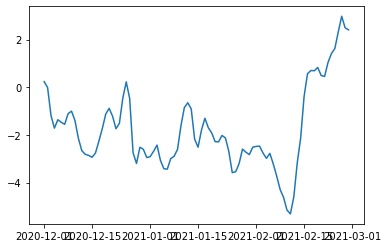

In [5]:
def get_month_AO(year,month,df):
    
    df = df[(df['Month'] == month) & (df['Year'] == year)]
    
    return(list(df.index), list(df['AO']))

def get_winter_AO(year,df):
    
    dates, AOs = [], []
    
    for month in [12,1,2]:
    
        get_year = year if month in [1,2] else year-1    
        
        dt,ao = get_month_AO(get_year,month,df)
        
        dates += dt
        AOs += ao
        
    return(dates, AOs)
        

t,AO = get_winter_AO(2021,df)

plt.plot(t,AO)

In [14]:
wints_AO = {}

for year in range(1980,2022):
    wints_AO[year] = get_winter_AO(year,df)
    
pickle.dump(wints_AO, open('figure1_current/winter_AO.p','wb'))

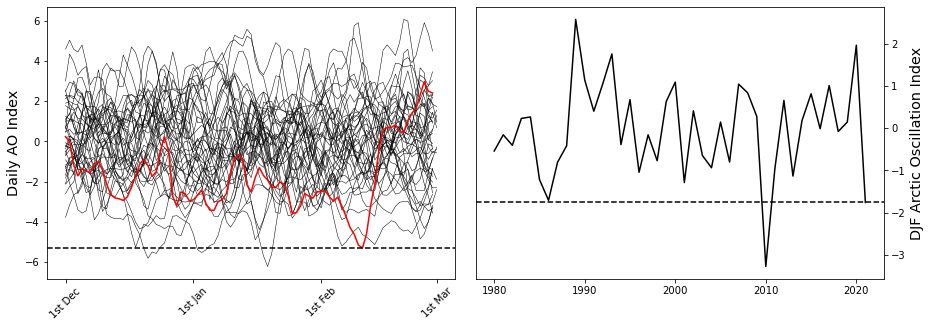

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

djf_mean_AOs = []

for year in range(1980,2022):    

    real_times, AO = wints_AO[year]
    
    if year == 2021:
        color = 'r'
        lw = 1.5
    else:
        color = 'k'
        lw=0.5
    
    ax1.plot(AO,color=color, lw=lw)
    
    djf_mean_AOs.append(np.mean(AO))
    
    if year == 2021:
        fmax = np.min(AO)
    
ax1.axhline(fmax, color='k', ls='--')

ax1.tick_params('x',rotation=45)

ax1.set_xticks([0,(31)*1,(31+31)*1,(31+31+28)*1])
ax1.set_xticklabels(['1st Dec', '1st Jan', '1st Feb', '1st Mar'])
ax1.set_ylabel('Daily AO Index', fontsize='x-large')

ax2.plot(range(1980,2022), djf_mean_AOs,color='k')
# ax2.plot(range(1980,2022), feb_mean_slps,color='r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.axhline(djf_mean_AOs[-1], color='k',ls='--')
ax2.set_ylabel('DJF Arctic Oscillation Index', fontsize='x-large')

plt.subplots_adjust(wspace=0.05)

# Perhaps delete what lies below

# Plot DJF AO

-1.757962

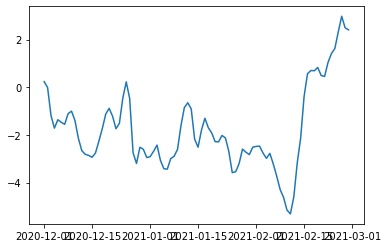

In [8]:
df_w21 = df[df.index >= datetime.date(year=2020,month=12,day=1)]

df_w21 = df_w21[df_w21.index < datetime.date(year=2021,month=3,day=1)]

plt.plot(df_w21.index, df_w21['AO'])

np.nanmean(df_w21['AO'])

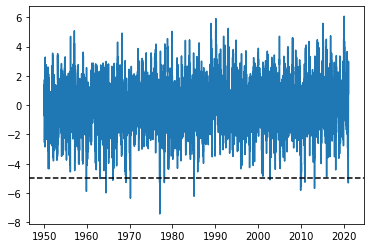

In [9]:
plt.plot(df.index,df['AO'])
plt.axhline(-5,color='k', ls='--')

In [10]:
print(f"Min value of {df['AO'].min()} on {df['AO'].idxmin()}")

Min value of -7.433 on 1977-01-15


# Get winter AO values only

In [11]:
winter_months = [10,11,12,1,2,3,4]

df['Month'] = [x.month for x in df.index]

df_winter = df[df['Month'].isin(winter_months)]

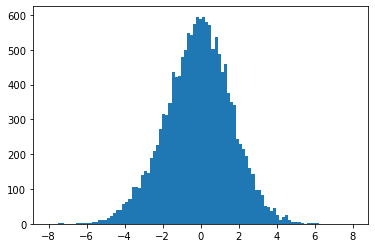

In [12]:
plt.hist(df_winter['AO'],bins=np.linspace(-8,8,100))
plt.show()

# Timeseries plot of AO values below 5

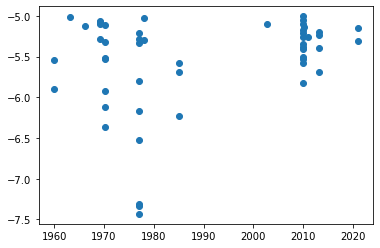

In [13]:
very_low_vals = df_winter[df_winter['AO'] < -5]

plt.scatter(very_low_vals.index, very_low_vals['AO'])

# Look at very low AO vals after 2000

In [55]:

low_modern_vals = very_low_vals[very_low_vals.index > datetime.date(year=2000,month=1,day=1)]
low_modern_vals

,Year,Month,Day,AO
date,,,,
2002-10-18,2002,10,18,-5.098
2009-12-20,2009,12,20,-5.341
2009-12-21,2009,12,21,-5.821
2009-12-22,2009,12,22,-5.503
2009-12-23,2009,12,23,-5.577
2009-12-24,2009,12,24,-5.256
2009-12-25,2009,12,25,-5.052
2010-01-02,2010,1,2,-5.384
2010-01-03,2010,1,3,-5.533


### So the vast majority of AO values below -5 occured in the winter of 2009/10, with a few occurring in March 2013

In [57]:
seasonal = df[df.index >= datetime.date(year=2020,month=12,day=1)]
seasonal

,Year,Month,Day,AO
date,,,,
2020-12-01,2020,12,1,0.236
2020-12-02,2020,12,2,-0.011
2020-12-03,2020,12,3,-1.188
2020-12-04,2020,12,4,-1.713
2020-12-05,2020,12,5,-1.363
...,...,...,...,...
2021-01-27,2021,1,27,-3.202
2021-01-28,2021,1,28,-2.593
2021-01-29,2021,1,29,-2.726


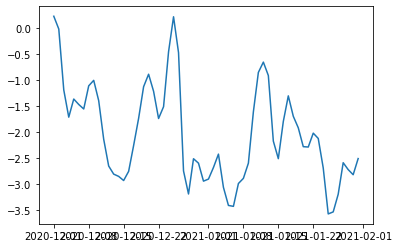

In [61]:
plt.plot(seasonal.index, seasonal['AO'])

In [63]:
import pickle

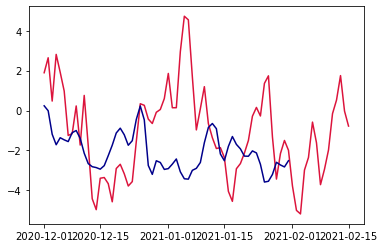

In [92]:
data_dir = '/home/robbie/Dropbox/beaufort_sea/vorticity_files/'

year = 2021
vort_data = pickle.load(open(f'{data_dir}{year}_mean_vort.p','rb'))



jan_vort_df = pd.DataFrame({'data':vort_data['mean_vort'][1], 'time': vort_data['times'][1]})

feb_vort_df = pd.DataFrame({'data':vort_data['mean_vort'][2], 'time': vort_data['times'][2]})

year = 2020
vort_data = pickle.load(open(f'{data_dir}{year}_mean_vort.p','rb'))

dec_vort_df = pd.DataFrame({'data':vort_data['mean_vort'][12], 'time': vort_data['times'][12]})

vort_df = pd.concat([dec_vort_df, jan_vort_df, feb_vort_df],axis=0)

t0 = datetime.datetime(1900,1,1)

vort_df['dt'] = [t0 + datetime.timedelta(hours=int(s)) for s in vort_df['time']]

vort_df.set_index('dt',inplace=True)

vort_df = vort_df.resample('1D').mean()

plt.plot(vort_df.index, vort_df['data'],color='crimson')
plt.plot(seasonal.index, seasonal['AO'],color='darkblue')


# for d, t        in zip([mv_data_dec, mv_data_jan, mv_data_feb],
#                        [mv_time_dec, mv_time_jan, mv_time_feb]):
    
#     plt.plot(t,d)
# plt.plot(mv_time, mv_data)

# times_month = vort_data['times'][month]
# vorts_month = vort_data['mean_vort'][month]